In [7]:
import platform
print(platform.machine())

# make sure to use python for arm64 architecture (at lease in my mac), it getting errors when using tensorflow

arm64


# KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import joblib

def KNN_main(
    file_path,
    scaler_filename,
    model_filename,
    cv_folds=5  # Number of folds for cross-validation
):
    # Read the data
    df = pd.read_csv(file_path)

    # Drop columns 'session', 'date', 'batch'
    df = df.drop(columns=['session', 'date', 'batch'])

    # Identify feature columns based on 'channels' and 'preprocessing'
    feature_cols = []
    for col in df.columns:
        if col != 'device_label':
            for ch in channels:
                if col.startswith(f"{ch}_"):
                    for preproc in preprocessing:
                        if f"_{preproc}_" in col:
                            feature_cols.append(col)
    # Remove duplicates and sort the feature columns
    feature_cols = sorted(set(feature_cols))

    # Extract features X and target y
    X = df[feature_cols].values
    y = df['device_label'].values

    # Apply scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Save the scaler
    joblib.dump(scaler, scaler_filename)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'n_neighbors': range(1, 21),  # Test 1 to 20 neighbors
        'weights': ['uniform', 'distance'],  # Weighting methods
        'metric': ['euclidean', 'manhattan']  # Distance metrics
    }
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=cv_folds, scoring='accuracy')
    grid_search.fit(X_scaled, y)

    # Get the best model and its accuracy
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Save the best model
    joblib.dump(best_model, model_filename)

    # Print the results
    print(f"Best Parameters: {best_params}")
    print(f"Cross-Validation Accuracy: {best_score:.4f}")
    print(f"Scaler saved to {scaler_filename}")
    print(f"KNN model saved to {model_filename}")

    return best_model, best_params, best_score


In [11]:
best_model, best_params, best_score = KNN_main(
    file_path='master_features.csv',
    channels=['ch1'],
    preprocessing=['welch'],
    scaler_filename='scaler_knn2.pkl',
    model_filename='model_knn2.h5',
    cv_folds=10  # Optional: specify the number of cross-validation folds
)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Cross-Validation Accuracy: 0.9985
Scaler saved to scaler_knn2.pkl
KNN model saved to model_knn2.h5


# MODEL 1

In [9]:
# main.py

import raw_data_model_training as mt

def main(file_path='master_features.csv', channels=None, preprocessing=None,
         mlb_filename='mlb.pkl', scaler_filename='scaler.pkl', model_filename='model.h5'):
    """
    Main function to load data, filter features, and train the model.
    Args:
        file_path: Path to the master features CSV file.
        channels: List of channels to include (e.g., ['ch1', 'ch2']).
        preprocessing: List of preprocessing methods to include (e.g., ['welch', 'hist']).
        mlb_filename: Filename to save the MultiLabelBinarizer.
        scaler_filename: Filename to save the Scaler.
        model_filename: Filename to save the trained model.
    """
    # Load the data
    data = mt.load_data(file_path)

    # Filter features based on user selection
    filtered_data = mt.filter_features(data, channels, preprocessing)

    # Prepare the data for training
    X, y, mlb, scaler = mt.prepare_data(filtered_data, mlb_filename, scaler_filename)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = mt.train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    mt.train_model(X_train, X_test, y_train, y_test, model_filename)


Epoch 1/50


/Users/augustochang/miniforge3/envs/tester_arm/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - binary_accuracy: 0.8041 - loss: 0.4093 - val_binary_accuracy: 0.9135 - val_loss: 0.1774
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - binary_accuracy: 0.9020 - loss: 0.1890 - val_binary_accuracy: 0.9276 - val_loss: 0.1500
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - binary_accuracy: 0.9195 - loss: 0.1609 - val_binary_accuracy: 0.9326 - val_loss: 0.1358
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.9275 - loss: 0.1447 - val_binary_accuracy: 0.9393 - val_loss: 0.1241
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.9293 - loss: 0.1397 - val_binary_accuracy: 0.9429 - val_loss: 0.1197
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - binary_accuracy: 0.9352 - loss: 0.1339 - val_binary_accuracy: 0.9469 - val_loss: 0.1146
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - binary_accuracy: 0.9375 - loss: 0.1271 - val_binary_accuracy: 0.9484 - val_loss: 0.1117
Epoch 8/50
323/32

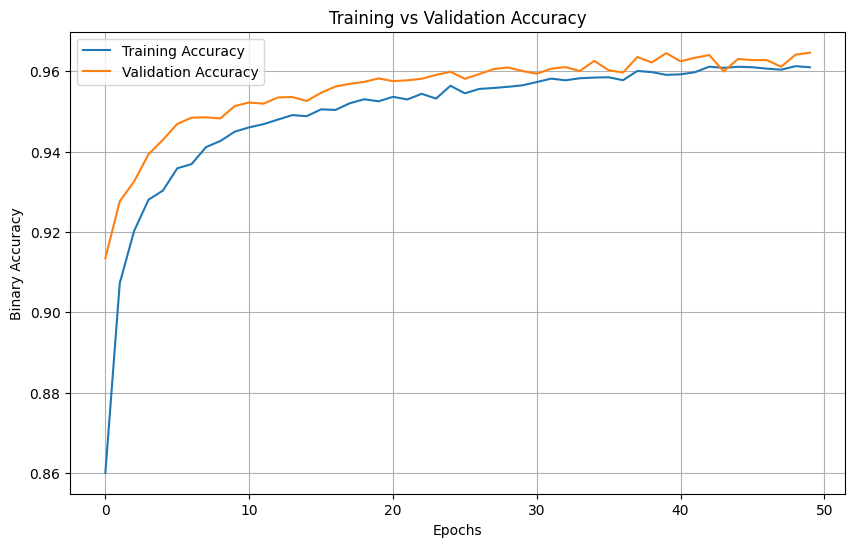

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9661 - loss: 0.0769
Test Loss: 0.07748822122812271
Test Accuracy: 0.9645897746086121


In [10]:
# Options: channels=['ch1','ch2'], preprocessing=['welch', 'hist'], etc.
# Call the main function with specified arguments
main(
    file_path='master_features.csv',
    channels=['ch1'],
    preprocessing=['welch'],
    mlb_filename='mlb_w1_express.pkl',
    scaler_filename='scaler_w1_express.pkl',
    model_filename='model_w1_express.h5'
)

Epoch 1/50


/Users/augustochang/miniforge3/envs/tester_arm/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2433/2433 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - binary_accuracy: 0.7754 - loss: 0.4069 - val_binary_accuracy: 0.8745 - val_loss: 0.2879
Epoch 2/50
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - binary_accuracy: 0.8645 - loss: 0.2892 - val_binary_accuracy: 0.9105 - val_loss: 0.2156
Epoch 3/50
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - binary_accuracy: 0.8934 - loss: 0.2380 - val_binary_accuracy: 0.9235 - val_loss: 0.1877
Epoch 4/50
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - binary_accuracy: 0.9059 - loss: 0.2149 - val_binary_accuracy: 0.9276 - val_loss: 0.1744
Epoch 5/50
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - binary_accuracy: 0.9111 - loss: 0.2036 - val_binary_accuracy: 0.9293 - val_loss: 0.1656
Epoch 6/50
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - binary_accuracy: 0.9146 - loss: 0.1943 - val_binary_accuracy: 0.9295 - val_loss: 0.1629
Epoch 7/50
2433/2433 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - binary_accuracy: 0.9178 - loss: 0.1863 - val_binary_accuracy: 0.9319 - val_loss: 0.1

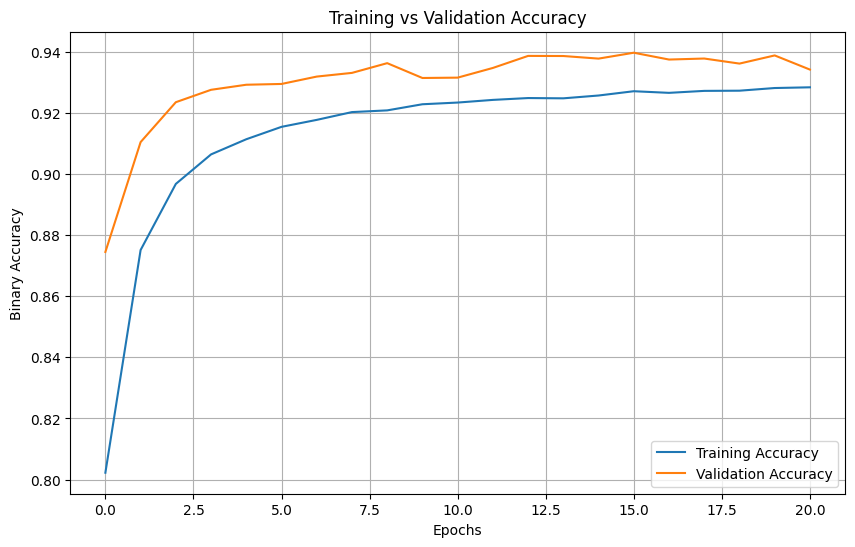

609/609 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9384 - loss: 0.1380
Test Loss: 0.13704879581928253
Test Accuracy: 0.9397384524345398


In [ ]:
main(
    file_path='master_features.csv',
    channels=['ch1'],
    preprocessing=['hist'],
    mlb_filename='mlb_h1.pkl',
    scaler_filename='scaler_h1.pkl',
    model_filename='model_h1.h5'
)

In [11]:
def predict_labels(input_data):
    """
    Takes a dictionary with 'timestamp' and 'features', uses the trained model to predict labels and their probabilities.
    
    Parameters:
    input_data (dict): A dictionary containing 'timestamp' and 'features' keys.
        - 'features' should be a dictionary containing the feature names and their corresponding values.
    
    Returns:
    tuple: A tuple containing:
        - predicted_labels (list): A list of predicted labels.
        - label_probabilities (dict): A dictionary mapping label names to their predicted probabilities.
    """
    import numpy as np
    import pandas as pd
    from tensorflow.keras.models import load_model
    import joblib

    # Load the saved model, scaler, and mlb
    model = load_model('model.h5')
    scaler = joblib.load('scaler.pkl')
    mlb = joblib.load('mlb.pkl')

    # Extract features from input_data
    features = input_data.get('features')
    if features is None:
        raise ValueError("Input data must contain 'features' key.")

    # Define the feature columns (should match the columns used during training)
    feature_columns = ['ch1_entropy', 'ch1_skewness', 'ch1_interquartile_range',
                       'ch1_kurtosis', 'ch1_percentile_75', 'ch1_range', 'ch1_maximum',
                       'ch1_median', 'ch1_percentile_90', 'ch1_mean_absolute_deviation',
                       'ch2_entropy', 'ch2_skewness', 'ch2_interquartile_range', 'ch2_kurtosis',
                       'ch2_percentile_75', 'ch2_range', 'ch2_maximum', 'ch2_median',
                       'ch2_percentile_90', 'ch2_mean_absolute_deviation']

    # Ensure all required features are provided
    missing_features = set(feature_columns) - set(features.keys())
    if missing_features:
        raise ValueError(f"The following features are missing: {missing_features}")

    # Create a DataFrame with the feature columns
    X = pd.DataFrame([features], columns=feature_columns)

    # Standardize the features
    X_scaled = scaler.transform(X)

    # Make predictions
    probabilities = model.predict(X_scaled)[0]

    # Apply threshold to get binary predictions
    threshold = 0.5
    predictions_binary = (probabilities >= threshold).astype(int)

    # Ensure predictions_binary is 2D
    predictions_binary = predictions_binary.reshape(1, -1)

    # Get the predicted labels
    predicted_labels = mlb.inverse_transform(predictions_binary)[0]

    # Map label names to probabilities
    label_probabilities = dict(zip(mlb.classes_, probabilities))

    return predicted_labels, label_probabilities


In [12]:
input_data = {
    "timestamp": "2024-11-16T11:21:42.984295",
    "features": {
        "ch1_entropy": 6.055838550421127,
        "ch1_skewness": 1.6854847856978579,
        "ch1_interquartile_range": 12.499051187863515,
        "ch1_kurtosis": 3.8142032201666742,
        "ch1_percentile_75": -91.11004192373038,
        "ch1_range": 58.396163442199935,
        "ch1_maximum": -52.497545961572214,
        "ch1_median": -99.63137592699621,
        "ch1_percentile_90": -85.9383662929428,
        "ch1_mean_absolute_deviation": 7.475433876743536,
        "ch2_entropy": 6.056304436782687,
        "ch2_skewness": 0.9561831708605654,
        "ch2_interquartile_range": 13.541007771210815,
        "ch2_kurtosis": 0.16472403885557307,
        "ch2_percentile_75": -96.04334293409036,
        "ch2_range": 41.92942277008781,
        "ch2_maximum": -73.75709510856511,
        "ch2_median": -104.24789921906924,
        "ch2_percentile_90": -86.65169851349094,
        "ch2_mean_absolute_deviation": 8.162076344463774
    }
}

# Predict labels and probabilities
predicted_labels, label_probabilities = predict_labels(input_data)

# Output the results
print("Predicted Labels:", predicted_labels)
print("Label Probabilities:")
for label, prob in label_probabilities.items():
    print(f"{label}: {prob:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Predicted Labels: ('ipad_augusto_on', 'smart_bulb_augusto_on_v2')
Label Probabilities:
background_empty: 0.0046
ipad_augusto_off: 0.0000
ipad_augusto_on: 1.0000
mac_luca_on: 0.0000
smart_bulb_augusto_on_v2: 1.0000
